# Projecte github

# Imports

In [282]:
# Draw the plots immediately after the current cell
%matplotlib inline

import pandas as pd
# Uncomment the following line to install pymysql
#!pip install PyMySQL
import pymysql
import warnings

# POLARS # <- teacher said that this one is 1000% faster than pandas.

# Project configuration

The file that we are going to use to set up the basic structure:

GitHubScraper/JupyterNotebook/Structure/githubProjectStructure.sql

from the github repository.

### Step 1, import the structure
In workbench: 
"Server" -> "Data Import", and then you should select the direction of "githubProjectStructure.sql" using the 3 dots and import from self-contained file like in the following image:

![Javatpoint](./Images/Project_Setup/data_import.png)  

Then scroll down, and create a new Schema by clicking on the "New..." button. Name it: "githubProject".

![Javatpoint](./Images/Project_Setup/create_new_schema.png)  

Scroll to the bottom, and in the bottom right, click on "Start import". If there are no errors, it will transitionate to "Import progress" and indicate success.

Refresh the scehmas:

![Javatpoint](./Images/Project_Setup/refresh.png)  

### Step 2, importing the data from the csv files

Download the csv files [here](https://drive.google.com/drive/folders/1NWhfFss0_M9V_clkcE9TH-Fy3oIEndWV?usp=sharing).

Selecting the "githubProject" scheme, right click and "Table Data Import Wizard", with this, we are going to import each csv file to the matching table.

You have to select the .csv you want to import, for example in this case, the trendVisits.csv

![Javatpoint](./Images/Project_Setup/file_import.png) 

Then, since you already have the structure, you have to use the existing table that matches with the correct csv file:

![Javatpoint](./Images/Project_Setup/use_existing.png) 

After that, check that the variables type are correct and import it. Do this for each csv file.

You can also verify the data by doing this:

![Javatpoint](./Images/Project_Setup/verify.png) 



# Introduction

TODO index or sections indicating what are we doing...

In [344]:
#https://www.geeksforgeeks.org/connect-to-mysql-using-pymysql-in-python/
# Connect to MySQL database
def tryToConnectMySQL(db_name, db_host, db_port, db_username, db_password):
    try:
        conn = pymysql.connect(host=db_host,
                               port=db_port,
                               user=db_username,
                               password=db_password,
                               db=db_name)
        if conn:
            print("Connection successful")
        else:
            print("Error")
        
        return conn
        
    except pymysql.Error as e:        
        warnings.warn("Error connecting to MySQL:", e)
        return None

# Pass arguments from outside
db_name = "githubProject"
db_host = "localhost"
db_port = 3306
db_username = "root"
db_password = input("Input your password")

dataBaseConnection = tryToConnectMySQL(db_name, db_host, db_port, db_username, db_password)

Input your password Muck23Luck_


Connection successful


In [345]:
# Execute query and return data in pandas dataframe 
def execute_select_query(cursor, query):
    try:
        cursor.execute(query)
        output = cursor.fetchall()
        # Fetch column names from cursor's description
        columns = [desc[0] for desc in cursor.description]
        
        # Convert output to pandas DataFrame
        if output:
            df = pd.DataFrame(output, columns=columns)
            print("Query executed successfully!")
        return output, df
            
    except pymysql.Error as e:
        print("Error executing query:")
        warnings.warn(str(e))
        return None, None

In [346]:
# Obtain the cursos in order to interact with the DataBase
cursor = dataBaseConnection.cursor()

# Tables
Shows the table for the different entities of the Data Base.

## Repositories

In [347]:
query = "SELECT * FROM Repositories;"

output_repo, df_repo = execute_select_query(cursor, query)
df_repo.tail(5)

Query executed successfully!


,owner,name,mainLanguage,license
1204,ujjwalkarn,Twitter-Sentiment-Analysis,Python,
1205,resemble-ai,resemble-enhance,Python,
1206,resemble-ai,MelNet,Python,
1207,resemble-ai,resemble-unity-text-to-speech,C#,
1208,dennybritz,reinforcement-learning,Jupyter Notebook,


In [348]:
query = "SELECT * FROM RepositoryVisits;"

output_repo_visists, df_repo_visists = execute_select_query(cursor, query)
df_repo_visists.head(5)

Query executed successfully!


,date,name,owner,forks,commits,stars,watchers,contributors,openIssues,closedIssues,openPullRequests,closedPullRequests
0,1.709455e+09,go-gitea,gitea,5100,17384,-1,-1,-1,-1,-1,-1,-1
1,1.709455e+09,colbyfayock,next-wordpress-starter,279,772,-1,-1,-1,-1,-1,-1,-1
2,1.709455e+09,mattermost,mattermost,6700,18212,-1,-1,-1,-1,-1,-1,-1
3,1.709455e+09,Luohuayu,CatServer,194,-1,-1,-1,-1,-1,-1,-1,-1
4,1.709455e+09,hoppscotch,hoppscotch,4100,5164,-1,-1,-1,-1,-1,-1,-1


In [349]:
query = "SELECT * FROM RepositoryTopics;"

output_repo_topics, df_repo_topics = execute_select_query(cursor, query)
df_repo_topics.tail(5)

Query executed successfully!


,owner,repo,topic
6199,acemod,ACE-Anvil,mod
6200,acemod,ACE-Anvil,arma
6201,acemod,ACE-Anvil,ace
6202,acemod,ACE-Anvil,realism
6203,acemod,ACE-Anvil,arma-reforger


## Owners

In [350]:
query = "SELECT * FROM Owners;"
# Use _ to ignore
_, df_owners = execute_select_query(cursor, query)
df_owners.head(5)

Query executed successfully!


,username
0,PinewoodPip
1,go-gitea
2,colbyfayock
3,mattermost
4,Luohuayu


In [351]:
query = "SELECT * FROM OwnerVisits;"

output_owner_visits, df_owner_visits = execute_select_query(cursor, query)
df_owner_visits.head(5)

Query executed successfully!


,date,username,contributionsLastYear
0,1.709455e+09,PinewoodPip,1774
1,1.709455e+09,colbyfayock,1878
2,1.709455e+09,Luohuayu,79
3,1.709455e+09,jacopotediosi,376
4,1.709455e+09,trekhleb,210


## Commits

In [352]:
query = "SELECT * FROM Commits;"

output_commits, df_commits = execute_select_query(cursor, query)
df_commits.head(5)

Query executed successfully!


,sha,author,repository,repositoryOwner,message
0,d91358e1238066650bb7d1b271dfcfc8ca6c2026,lukekarrys,rfcs,npm,chore: postinstall for dependabot template-oss PR
1,149ad1d4d51463b0a2c6902a5f133fe9dcbdd705,dependabot[bot],rfcs,npm,chore: bump @npmcli/template-oss from 4.21.1 to 4.21.3
2,c452b65abf0af780e9a2b6f0e0b00fb0aa6931e7,lukekarrys,rfcs,npm,chore: postinstall for dependabot template-oss PR
3,b4b6622cca2603ae7ced4bc7f3f2ff2b7ee5f291,dependabot[bot],rfcs,npm,chore: bump @npmcli/template-oss from 4.19.0 to 4.21.1
4,bdf4764322ce20137975298c8283b52f08549b37,lukekarrys,rfcs,npm,chore: postinstall for dependabot template-oss PR


## Topics

In [353]:
query = "SELECT * FROM Topics;"

output_topics, df_topics = execute_select_query(cursor, query)
df_topics.tail(5)

Query executed successfully!


,name,mainLanguage
9,mod,Java
10,unity3d,C#
11,machine-learning,Jupyter Notebook
12,deep-learning,Python
13,emulation,C++


In [354]:
query = "SELECT * FROM TopicVisits;"

_, df_topic_visits = execute_select_query(cursor, query)
df_topic_visits.head(5)

Query executed successfully!


,date,name,repositories,followers
0,1.709539e+09,nodejs,238297,77600
1,1.709539e+09,javascript,510373,169000
2,1.709539e+09,npm,19224,28800
3,1.709539e+09,next,4376,1500
4,1.709539e+09,react,347483,98800


## Trend

In [355]:
query = "SELECT * FROM TrendVisits;"

_, df_trend_visits = execute_select_query(cursor, query)
df_trend_visits.head(5)

Query executed successfully!


,date,repo_name,owner,starsToday
0,1.712734e+09,plandex-ai,plandex,1459
1,1.712734e+09,nashsu,FreeAskInternet,1284
2,1.712734e+09,drawdb-io,drawdb,665
3,1.712734e+09,langgenius,dify,581
4,1.712734e+09,PawanOsman,ChatGPT,410


In [356]:
# Closes the connection
dataBaseConnection.close()

# Analysis

### Basic statistics
* Distribution of main topics (bar or pie chart). Aka, in what proportion of our studied repos are they treated.
* Distribution of languages (bar or pie chart). Like above.
* Time evolution of interest in topics: repositories per topic, followers per topic.

### Dimensional reduction for an overview on repositories
What we mean here is to perform a PCA (principal components analysis) in order to able to have an insight on the structre of the whole dataset. We would then color the data points in it depending on the language used, for instance, to see if these groups have similar characteristics and lie close in the dataframe or not.
* Create a dataframe containing all RepositoryVisits data for a certain date for all the studied repositories.
* Perform a standarization on the data (i.e., to prevent some variables such as commits to be far more important than others such as forks).
* Perform a PCA into 2 components on it.
* Plot the results while clustering the points depending on different criteria:
    + mainLanguage
    + topic
* Supervised machine learning using stars.
### Open questions
* How to use stars and trends?
* How to use contributions by owners?


# Commits analisis

In [357]:
import numpy as np
from os import path
from PIL import Image
"""
If 
!pip install wordcloud 
doesn't work:
import sys
print(sys.executable) # use the path

path -m pip install wordcloud
"""
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# https://www.datacamp.com/tutorial/wordcloud-python

In [358]:
import warnings
warnings.filterwarnings("ignore")

In [359]:
def plot_word_cloud(word_cloud, text, save_image = False, image_name = "none"):
    # Create and generate a word cloud image:
    word_cloud_output = word_cloud.generate(text)
    
    # Display the generated image:
    plt.imshow(word_cloud_output, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    if save_image:
        word_cloud_output.to_file(f"./Images/wordclouds/{image_name}_word_cloud.png")
        
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
        
def obtain_mask(mask):    
    trans_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
    for i in range(len(mask)):
        trans_mask[i] = list(map(transform_format, mask[i]))
    return trans_mask        

## Data cleaning

### Remove stop words

In [360]:
stopwords = set(STOPWORDS)
# stopwords.update(["a"]) # manually add stopwords

### Remove commits made by bots

In [380]:
# Find all the commits authored by a bot.
from IPython.display import display
pd.set_option('display.max_rows', None)

cond_a = df_commits[df_commits["author"].str.contains("\[bot]|-bot")]
cond_c = df_commits[df_commits["message"].str.contains("dependabot")]
cond_d = df_commits[df_commits["message"].str.contains("renovatebot")]

temp = pd.concat([cond_a])

unique_auth = pd.unique(temp.author)
unique_msg = pd.unique(cond_c.message)

dict = {'bots' : unique_auth}
df_bots = pd.DataFrame(dict)

# displaying the bots names
display(df_bots)

dict = {'bots_message' : unique_msg}
df_bots_msg = pd.DataFrame(dict)

display(df_bots_msg)

,bots
0,dependabot[bot]
1,jhipster-bot
2,renovate[bot]
3,semantic-release-bot
4,github-actions[bot]
5,storybook-bot
6,lgtm-com[bot]
7,electron-roller[bot]
8,up-up-and-away[bot]
9,java-team-github-bot


,bots_message
0,chore: postinstall for dependabot template-oss PR
1,Merge pull request #624 from npm/dependabot/npm_and_yarn/node-fetch-2.6.7
2,Merge pull request #625 from npm/dependabot/npm_and_yarn/minimist-1.2.6
3,Merge pull request #215 from bailicangdu/dependabot/npm_and_yarn/lodash-4.17.19
4,Merge pull request #435 from jhipster/dependabot/npm_and_yarn/adobe/css-tools-4.3.2
5,Merge pull request #428 from jhipster/dependabot/npm_and_yarn/babel/traverse-7.23.2
6,Merge pull request #414 from jhipster/dependabot/npm_and_yarn/adobe/css-tools-4.3.1
7,Merge branch main' into dependabot/npm_and_yarn/adobe/css-tools-4.3.1'
8,Merge pull request #419 from jhipster/dependabot/maven/org.eclipse.jgit-org.eclipse.jgit-6.6.1.202309021850-r
9,Merge branch main' into dependabot/maven/org.eclipse.jgit-org.eclipse.jgit-6.6.1.202309021850-r'


In [342]:
# Filtering the bots
print("With bots", len(df_commits))
df_commits = df_commits[~df_commits["author"].isin(df_bots["bots"])]
print("Without bots", len(df_commits))

With bots 11801
Without bots 3947


In [302]:
df_commits_small = df_commits.tail() # only last 5
print(df_commits_small.tail().message, "\n")
small_text_sample = " ".join(commit for commit in df_commits_small.message) # concatenate them
print("Concatenated text:", text)
image_name = "first_word_cloud"
word_cloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="black")

12821    All parts first time onboard - placed
12822                          Layout commit 1
12823                             Buzzer added
12824             Schematic should be complete
12825                             First commit
Name: message, dtype: object 

Concatenated text: All parts first time onboard - placed Layout commit 1 Buzzer added Schematic should be complete First commit


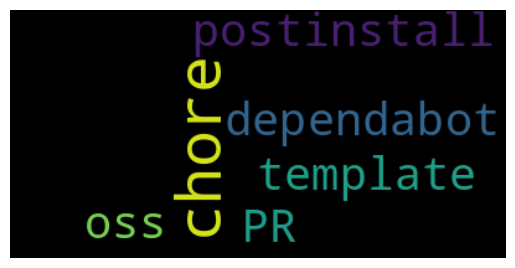

In [322]:
text_hyper_small = df_commits["message"][0]

image_name = "first_word_cloud"
word_cloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="black")

plot_word_cloud(word_cloud, text_hyper_small)

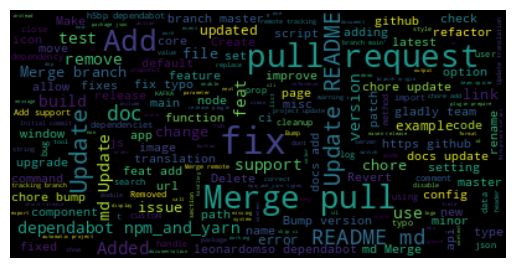

In [319]:
all_text = " ".join(commit for commit in df_commits.message) # concatenate them
word_cloud = WordCloud(stopwords=stopwords, max_font_size=30, max_words=200, background_color="black")
plot_word_cloud(word_cloud, all_text)

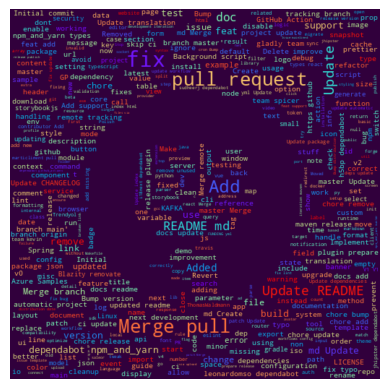

In [331]:
# Use a mask and a color map
        
# <a href='https://dryicons.com/icon/square-github-icon-8312'> Icon by Dryicons </a>
github_image = np.array(Image.open("./Images/wordclouds/github_square.png"))

word_cloud_mask = obtain_mask(github_image)
# Word cloud repeats words since he needs fill the gaps using the correct size.
# print(len(all_text.split(' ')))
# print(len(pd.unique(all_text.split(' '))))

word_cloud = WordCloud(stopwords=stopwords, colormap='rainbow', mask=word_cloud_mask, max_font_size=30, max_words=10000, background_color="#31003C")
plot_word_cloud(word_cloud, all_text, True, "git_mask")

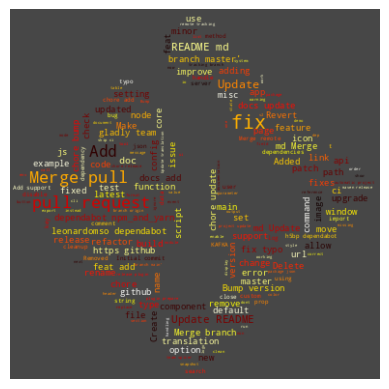

In [335]:
# Use a mask        
git_image = np.array(Image.open("./Images/wordclouds/git.png"))

word_cloud_mask = obtain_mask(git_image)

word_cloud = WordCloud(stopwords=stopwords, mask=word_cloud_mask,colormap='hot', max_font_size=20, max_words=10000, background_color="#474747")
plot_word_cloud(word_cloud, all_text)

In [323]:
# Here goes some grafics bars

In [307]:
#Could explore the wordcloud of specific projects too:
#TODO